In [4]:
from constants import *
import camera_lib
import matplotlib.pyplot as plt
from ultralytics import YOLO
import clip
import torch
import cv2

In [4]:
cam = camera_lib.Camera(0)

KeyboardInterrupt: 

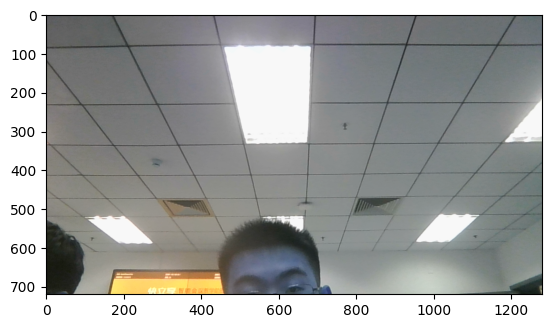

In [3]:
img = cam.capture1920x1080()
plt.figure()
plt.imshow(img)
plt.show()

In [3]:
device = "cuda" if torch.cuda.is_available() else "cpu"
model, preprocess = clip.load("ViT-B/32", device=device)
model.eval()
input_resolution = model.visual.input_resolution
context_length = model.context_length
vocab_size = model.vocab_size

print("Model parameters:", f"{np.sum([int(np.prod(p.shape)) for p in model.parameters()]):,}")
print("Input resolution:", input_resolution)
print("Context length:", context_length)
print("Vocab size:", vocab_size)

Model parameters: 151,277,313
Input resolution: 224
Context length: 77
Vocab size: 49408


In [ ]:
image_names = ["shoe", "hamburger", "dog"]
original_images = []
images = []
query = "select apple from the scene"

for n in image_names:
    img = cv2.imread(f"../test/{n}.jpg")
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    original_images.append(img)

for img in original_images:
    images.append(preprocess(img))

image_input = torch.tensor(np.stack(images))
text_token = clip.tokenize(query)
with torch.no_grad():
    image_features = model.encode_image(image_input).float()
    text_features = model.encode_text(text_token).float()

image_features /= image_features.norm(dim=-1, keepdim=True)
text_features /= text_features.norm(dim=-1, keepdim=True)
similarity = text_features.cpu().numpy() @ image_features.cpu().numpy().T

print(similarity)